# Analysis - 2
## Comparison of Players
#### 1. Comparison by Runs
#### 2. Comparison by Balls faced
#### 3. Comparison by Strike Rate

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
path=os.getcwd()
path

'C:\\PYTHON\\desai_manav_spring2017\\Final'

In [3]:
path=path+'\\Original_Data\\'
path

'C:\\PYTHON\\desai_manav_spring2017\\Final\\Original_Data\\'

In [4]:
df_matches= pd.read_csv(path + "matches.csv")
df_deliveries= pd.read_csv(path + "deliveries.csv")

In [5]:
df_batsman = df_deliveries.groupby(["match_id", "inning", "batting_team", "batsman"])
df_batsman.head(2)


match_id  inning                 batting_team  \
0              1       1        Kolkata Knight Riders   
1              1       1        Kolkata Knight Riders   
2              1       1        Kolkata Knight Riders   
13             1       1        Kolkata Knight Riders   
34             1       1        Kolkata Knight Riders   
35             1       1        Kolkata Knight Riders   
82             1       1        Kolkata Knight Riders   
83             1       1        Kolkata Knight Riders   
108            1       1        Kolkata Knight Riders   
109            1       1        Kolkata Knight Riders   
124            1       2  Royal Challengers Bangalore   
125            1       2  Royal Challengers Bangalore   
126            1       2  Royal Challengers Bangalore   
128            1       2  Royal Challengers Bangalore   
132            1       2  Royal Challengers Bangalore   
133            1       2  Royal Challengers Bangalore   
139            1       2  Royal Challengers Bangalore   
146            1       2  Royal Challengers Bangalore   
155            1       2  Royal Challengers Bangalore   
158            1       2  Royal Challengers Bangalore   
159            1       2  Royal Challengers Bangalore   
160            1       2  Royal Challengers Bangalore   
176            1       2  Royal Challengers Bangalore   
177            1       2  Royal Challengers Bangalore   
178            1       2  Royal Challengers Bangalore   
179            1       2  Royal Challengers Bangalore   
185            1       2  Royal Challengers Bangalore   
186            1       2  Royal Challengers Bangalore   
198            1       2  Royal Challengers Bangalore   
199            1       2  Royal Challengers Bangalore   
...          ...     ...                          ...   
136392       577       1          Sunrisers Hyderabad   
136410       577       1          Sunrisers Hyderabad   
136411       577       1          Sunrisers Hyderabad   
136431       577       1          Sunrisers Hyderabad   
136433       577       1          Sunrisers Hyderabad   
136448       577       1          Sunrisers Hyderabad   
136449       577       1          Sunrisers Hyderabad   
136450       577       1          Sunrisers Hyderabad   
136453       577       1          Sunrisers Hyderabad   
136461       577       1          Sunrisers Hyderabad   
136463       577       1          Sunrisers Hyderabad   
136472       577       1          Sunrisers Hyderabad   
136474       577       2  Royal Challengers Bangalore   
136475       577       2  Royal Challengers Bangalore   
136476       577       2  Royal Challengers Bangalore   
136477       577       2  Royal Challengers Bangalore   
136544       577       2  Royal Challengers Bangalore   
136547       577       2  Royal Challengers Bangalore   
136555       577       2  Royal Challengers Bangalore   
136556       577       2  Royal Challengers Bangalore   
136563       577       2  Royal Challengers Bangalore   
136565       577       2  Royal Challengers Bangalore   
136571       577       2  Royal Challengers Bangalore   
136572       577       2  Royal Challengers Bangalore   
136578       577       2  Royal Challengers Bangalore   
136579       577       2  Royal Challengers Bangalore   
136587       577       2  Royal Challengers Bangalore   
136588       577       2  Royal Challengers Bangalore   
136595       577       2  Royal Challengers Bangalore   
136597       577       2  Royal Challengers Bangalore   

                       bowling_team  over  ball          batsman  \
0       Royal Challengers Bangalore     1     1       SC Ganguly   
1       Royal Challengers Bangalore     1     2      BB McCullum   
2       Royal Challengers Bangalore     1     3      BB McCullum   
13      Royal Challengers Bangalore     3     1       SC Ganguly   
34      Royal Challengers Bangalore     6     3       RT Ponting   
35      Royal Challengers Bangalore     6     4       RT Ponting 

### For the runs scored 

In [6]:
df_batsman = df_batsman["batsman_runs"].sum().reset_index()
df_batsman.head(2)

match_id  inning           batting_team      batsman  batsman_runs
0         1       1  Kolkata Knight Riders  BB McCullum           158
1         1       1  Kolkata Knight Riders    DJ Hussey            12

 ### For the balls faces

In [7]:
df_balls_faced_by_batsman = df_deliveries[df_deliveries["wide_runs"]==0]
df_balls_faced_by_batsman = df_balls_faced_by_batsman.groupby(["match_id", "inning","batsman"])["batsman_runs"].count().reset_index()
df_balls_faced_by_batsman.tail(2)


match_id  inning      batsman  batsman_runs
8642       577       2  Sachin Baby            10
8643       577       2      V Kohli            35

In [8]:
df_balls_faced_by_batsman.columns = ["match_id", "inning", "batsman", "balls_faced"]

In [9]:
df_batsman = pd.merge(df_batsman, df_balls_faced_by_batsman, left_on=["match_id", "inning", "batsman"],
right_on=["match_id", "inning", "batsman"], how="left")
df_batsman.head()

match_id  inning           batting_team          batsman  batsman_runs  \
0         1       1  Kolkata Knight Riders      BB McCullum           158   
1         1       1  Kolkata Knight Riders        DJ Hussey            12   
2         1       1  Kolkata Knight Riders  Mohammad Hafeez             5   
3         1       1  Kolkata Knight Riders       RT Ponting            20   
4         1       1  Kolkata Knight Riders       SC Ganguly            10   

   balls_faced  
0         73.0  
1         12.0  
2          3.0  
3         20.0  
4         12.0

### For Strike Rate

In [10]:
df_batsman["Strike-Rate"] = np.round(df_batsman["batsman_runs"]/ df_batsman["balls_faced"] *100 , 2)


df_batsman["More-Than-30"] = 0
df_batsman["More-Than-50"] = 0
df_batsman["More-Than-100"] = 0

df_batsman.ix[df_batsman.ix[:,"batsman_runs"] >= 30, "More-Than-30"] = 1
df_batsman.ix[df_batsman.ix[:,"batsman_runs"] >= 50, "More-Than-50"] = 1
df_batsman.ix[df_batsman.ix[:,"batsman_runs"] >= 100, "More-Than-100"] = 1

df_batsman.head(2)

match_id  inning           batting_team      batsman  batsman_runs  \
0         1       1  Kolkata Knight Riders  BB McCullum           158   
1         1       1  Kolkata Knight Riders    DJ Hussey            12   

   balls_faced  Strike-Rate  More-Than-30  More-Than-50  More-Than-100  
0         73.0       216.44             1             1              1  
1         12.0       100.00             0             0              0

In [11]:
df_batsman = df_matches[['id','season']].merge(df_batsman, left_on = 'id', 
                right_on = 'match_id', how = 'left').drop('id', axis = 1)

In [12]:
df_batsman.head()

season  match_id  inning           batting_team          batsman  \
0    2008         1       1  Kolkata Knight Riders      BB McCullum   
1    2008         1       1  Kolkata Knight Riders        DJ Hussey   
2    2008         1       1  Kolkata Knight Riders  Mohammad Hafeez   
3    2008         1       1  Kolkata Knight Riders       RT Ponting   
4    2008         1       1  Kolkata Knight Riders       SC Ganguly   

   batsman_runs  balls_faced  Strike-Rate  More-Than-30  More-Than-50  \
0           158         73.0       216.44             1             1   
1            12         12.0       100.00             0             0   
2             5          3.0       166.67             0             0   
3            20         20.0       100.00             0             0   
4            10         12.0        83.33             0             0   

   More-Than-100  
0              1  
1              0  
2              0  
3              0  
4              0

In [14]:
df_batsman.to_csv("C:\PYTHON\desai_manav_spring2017\Final\Analysis_2_Output\\batsman.csv")

# 1. Comparison of players on the basis of Runs Scored

In [15]:
inputstring = 'V Kohli'
inputstring1 = 'MS Dhoni'

In [16]:
for i in [inputstring1, inputstring]:
      df_new = df_batsman.ix[df_batsman.ix[:,"batsman"].str.contains(str(i))]
df_new

season  match_id  inning                 batting_team  batsman  \
13      2008         1       2  Royal Challengers Bangalore  V Kohli   
56      2008         4       2  Royal Challengers Bangalore  V Kohli   
164     2008        11       1  Royal Challengers Bangalore  V Kohli   
224     2008        15       2  Royal Challengers Bangalore  V Kohli   
253     2008        17       2  Royal Challengers Bangalore  V Kohli   
315     2008        21       2  Royal Challengers Bangalore  V Kohli   
376     2008        25       1  Royal Challengers Bangalore  V Kohli   
467     2008        31       1  Royal Challengers Bangalore  V Kohli   
528     2008        35       1  Royal Challengers Bangalore  V Kohli   
629     2008        42       2  Royal Challengers Bangalore  V Kohli   
716     2008        48       1  Royal Challengers Bangalore  V Kohli   
774     2008        52       1  Royal Challengers Bangalore  V Kohli   
906     2009        60       1  Royal Challengers Bangalore  V Kohli   
957     2009        63       2  Royal Challengers Bangalore  V Kohli   
986     2009        65       2  Royal Challengers Bangalore  V Kohli   
1033    2009        68       1  Royal Challengers Bangalore  V Kohli   
1065    2009        70       1  Royal Challengers Bangalore  V Kohli   
1149    2009        75       2  Royal Challengers Bangalore  V Kohli   
1225    2009        80       1  Royal Challengers Bangalore  V Kohli   
1354    2009        89       1  Royal Challengers Bangalore  V Kohli   
1427    2009        94       2  Royal Challengers Bangalore  V Kohli   
1525    2009       100       2  Royal Challengers Bangalore  V Kohli   
1703    2009       112       1  Royal Challengers Bangalore  V Kohli   
1739    2009       114       2  Royal Challengers Bangalore  V Kohli   
1758    2009       115       2  Royal Challengers Bangalore  V Kohli   
1816    2010       119       1  Royal Challengers Bangalore  V Kohli   
1861    2010       122       2  Royal Challengers Bangalore  V Kohli   
1972    2010       129       2  Royal Challengers Bangalore  V Kohli   
2030    2010       133       1  Royal Challengers Bangalore  V Kohli   
2112    2010       138       2  Royal Challengers Bangalore  V Kohli   
...      ...       ...     ...                          ...      ...   
7141    2015       475       2  Royal Challengers Bangalore  V Kohli   
7209    2015       479       2  Royal Challengers Bangalore  V Kohli   
7239    2015       481       2  Royal Challengers Bangalore  V Kohli   
7288    2015       484       2  Royal Challengers Bangalore  V Kohli   
7331    2015       487       1  Royal Challengers Bangalore  V Kohli   
7389    2015       491       2  Royal Challengers Bangalore  V Kohli   
7449    2015       495       2  Royal Challengers Bangalore  V Kohli   
7489    2015       498       1  Royal Challengers Bangalore  V Kohli   
7558    2015       503       1  Royal Challengers Bangalore  V Kohli   
7629    2015       507       2  Royal Challengers Bangalore  V Kohli   
7653    2015       509       2  Royal Challengers Bangalore  V Kohli   
7694    2015       512       2  Royal Challengers Bangalore  V Kohli   
7733    2015       515       1  Royal Challengers Bangalore  V Kohli   
7754    2015       516       1  Royal Challengers Bangalore  V Kohli   
7826    2016       521       1  Royal Challengers Bangalore  V Kohli   
7926    2016       528       1  Royal Challengers Bangalore  V Kohli   
7968    2016       531       1  Royal Challengers Bangalore  V Kohli   
7990    2016       533       1  Royal Challengers Bangalore  V Kohli   
8034    2016       536       1  Royal Challengers Bangalore  V Kohli   
8157    2016       544       2  Royal Challengers Bangalore  V Kohli   
8196    2016       547       1  Royal Challengers Bangalore  V Kohli   
8272    2016       552       2  Royal Challengers Bangalore  V Kohli   
8320    2016       556       1  Royal Challengers Bangalore  V Kohli   
8349    2016       558       1  Royal Challeng

In [17]:
df_player_comparison = df_batsman.ix[df_batsman.ix[:,"batsman"].str.contains(str(inputstring)) | df_batsman.ix[:,"batsman"].str.contains(str(inputstring1))]

In [18]:
df_player_comparison.head(2)

season  match_id  inning                 batting_team   batsman  \
13    2008         1       2  Royal Challengers Bangalore   V Kohli   
19    2008         2       1          Chennai Super Kings  MS Dhoni   

    batsman_runs  balls_faced  Strike-Rate  More-Than-30  More-Than-50  \
13             1          5.0        20.00             0             0   
19             2          3.0        66.67             0             0   

    More-Than-100  
13              0  
19              0

In [19]:
df_players_comparison_by_runs = df_player_comparison.groupby(['season', 'batting_team', 'batsman'])['batsman_runs'].sum().reset_index()

In [20]:
df_players_comparison_by_runs.head(10)

season                 batting_team   batsman  batsman_runs
0    2008          Chennai Super Kings  MS Dhoni           414
1    2008  Royal Challengers Bangalore   V Kohli           165
2    2009          Chennai Super Kings  MS Dhoni           332
3    2009  Royal Challengers Bangalore   V Kohli           246
4    2010          Chennai Super Kings  MS Dhoni           287
5    2010  Royal Challengers Bangalore   V Kohli           307
6    2011          Chennai Super Kings  MS Dhoni           392
7    2011  Royal Challengers Bangalore   V Kohli           557
8    2012          Chennai Super Kings  MS Dhoni           357
9    2012  Royal Challengers Bangalore   V Kohli           364

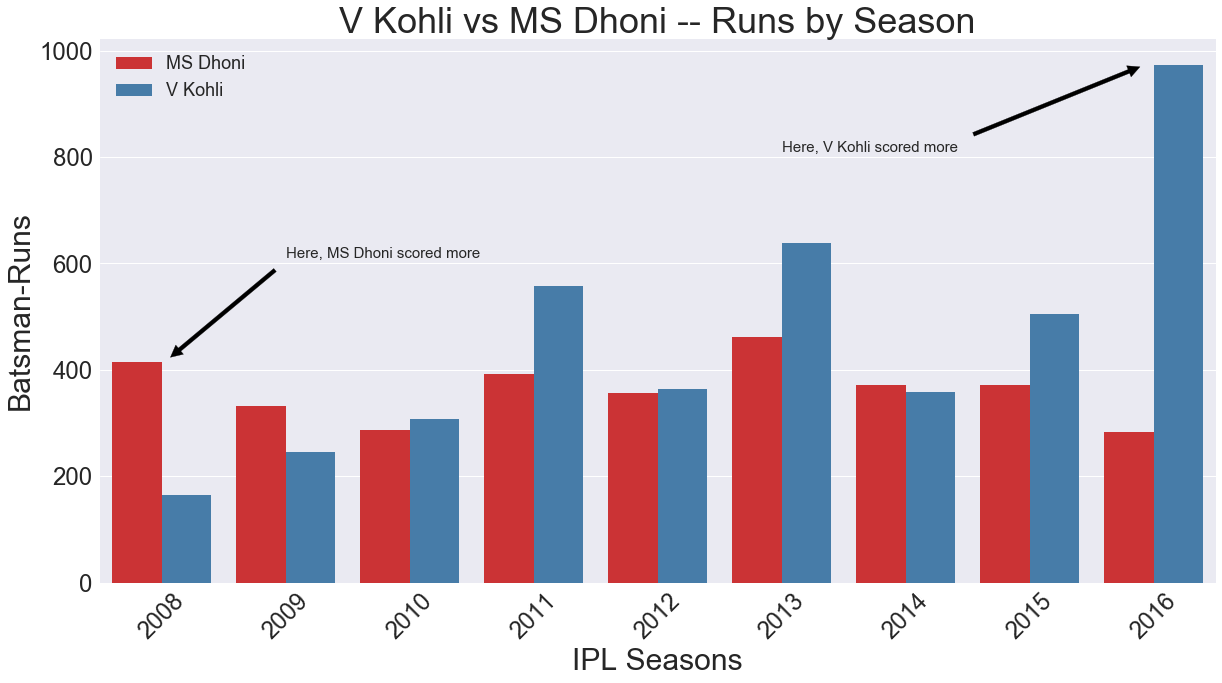

In [21]:
plt.subplots(figsize=(20,10))
sns.set_style("darkgrid")

top = sns.barplot(x="season", y="batsman_runs", hue="batsman",  palette="Set1" ,data=df_players_comparison_by_runs)
top.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Runs by Season")
plt.setp(top.xaxis.get_majorticklabels(),rotation=45)

top.set_xlabel("IPL Seasons")
top.set_ylabel("Batsman-Runs")
top.legend(fontsize= 18, loc="upper left")
top.xaxis.get_label().set_fontsize(30)
top.yaxis.get_label().set_fontsize(30)
top.title.set_fontsize(36)
top.tick_params(axis='x', which='major',labelsize=24)
top.tick_params(axis='y', which='major',labelsize=24)
top.annotate('Here, V Kohli scored more', fontsize=15, xy=(8, 980), xytext=(5, 810),arrowprops=dict(facecolor='black', shrink=0.07))
top.annotate('Here, MS Dhoni scored more', fontsize=15, xy=(0, 410), xytext=(1, 610),arrowprops=dict(facecolor='black', shrink=0.07))

### Conclusion
##### ~  In 2008 and 2009, MS Dhoni has scored more runs than V Kohli
##### ~ From 2010, V Kohli has improved the performance and scored more than MS Dhoni.

# 2. Comparison of players on the basis of Balls Faced

In [22]:
df_players_comparison_by_balls_faced = df_player_comparison.groupby(['season', 'batting_team', 'batsman'])['balls_faced'].sum().reset_index()

In [23]:
df_players_comparison_by_balls_faced.head()

season                 batting_team   batsman  balls_faced
0    2008          Chennai Super Kings  MS Dhoni        310.0
1    2008  Royal Challengers Bangalore   V Kohli        157.0
2    2009          Chennai Super Kings  MS Dhoni        261.0
3    2009  Royal Challengers Bangalore   V Kohli        219.0
4    2010          Chennai Super Kings  MS Dhoni        210.0

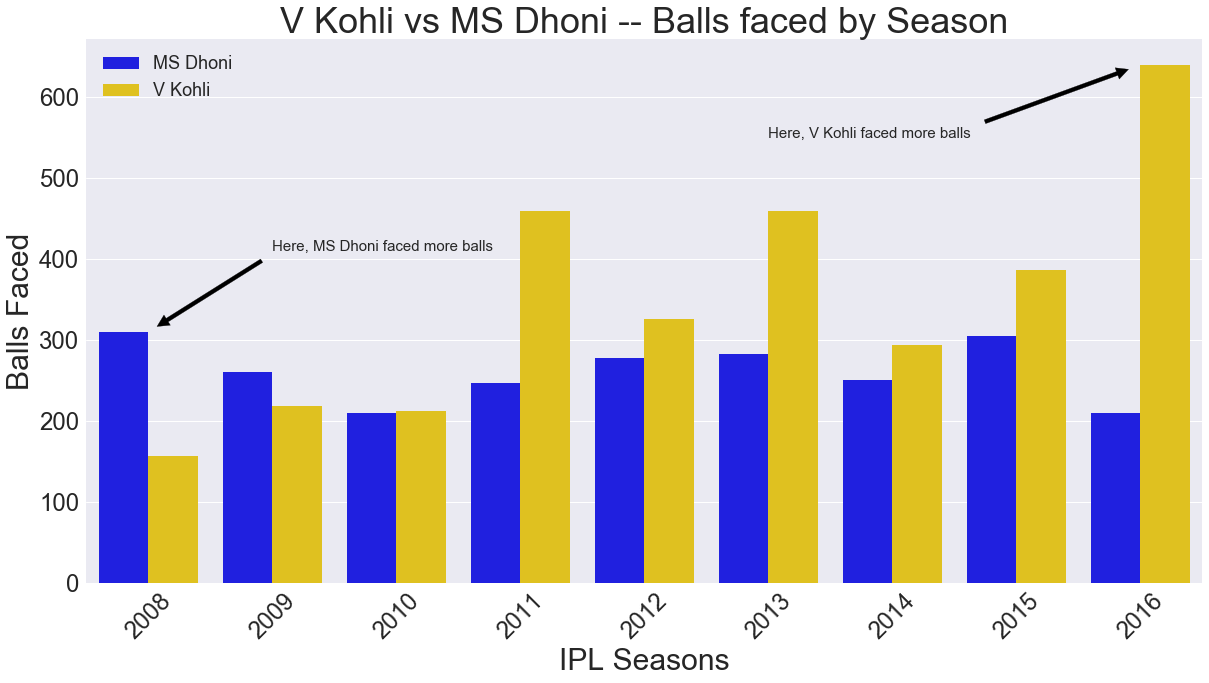

In [24]:
plt.subplots(figsize=(20,10))
sns.set_style("darkgrid")
colors=['blue','gold']
top = sns.barplot(x="season", y="balls_faced", hue="batsman",  palette=colors ,data=df_players_comparison_by_balls_faced)
top.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Balls faced by Season")
plt.setp(top.xaxis.get_majorticklabels(),rotation=45)

top.set_xlabel("IPL Seasons")
top.set_ylabel("Balls Faced")
top.legend(fontsize= 18, loc="upper left")
top.xaxis.get_label().set_fontsize(30)
top.yaxis.get_label().set_fontsize(30)
top.title.set_fontsize(36)
top.tick_params(axis='x', which='major',labelsize=24)
top.tick_params(axis='y', which='major',labelsize=24)
top.annotate('Here, V Kohli faced more balls', fontsize=15, xy=(8, 640), xytext=(5, 550),arrowprops=dict(facecolor='black', shrink=0.07))
top.annotate('Here, MS Dhoni faced more balls', fontsize=15, xy=(0, 310), xytext=(1, 410),arrowprops=dict(facecolor='black', shrink=0.07))

### Conclusion
##### ~ MS Dhoni, nearly faced same number of balls in every season
##### ~ The number of balls faced by V Kohli increased over the seasons and in 2016, he has faced most balls.

# 3. Comparison of players on the basis of Strike Rate

In [25]:
df_players_comparison_by_strike_rate = df_player_comparison.groupby(['season', 'batting_team', 'batsman'])['Strike-Rate'].mean().reset_index()
df_players_comparison_by_strike_rate.head()

season                 batting_team   batsman  Strike-Rate
0    2008          Chennai Super Kings  MS Dhoni   122.720000
1    2008  Royal Challengers Bangalore   V Kohli    96.238333
2    2009          Chennai Super Kings  MS Dhoni   116.968462
3    2009  Royal Challengers Bangalore   V Kohli   108.983077
4    2010          Chennai Super Kings  MS Dhoni   107.430909

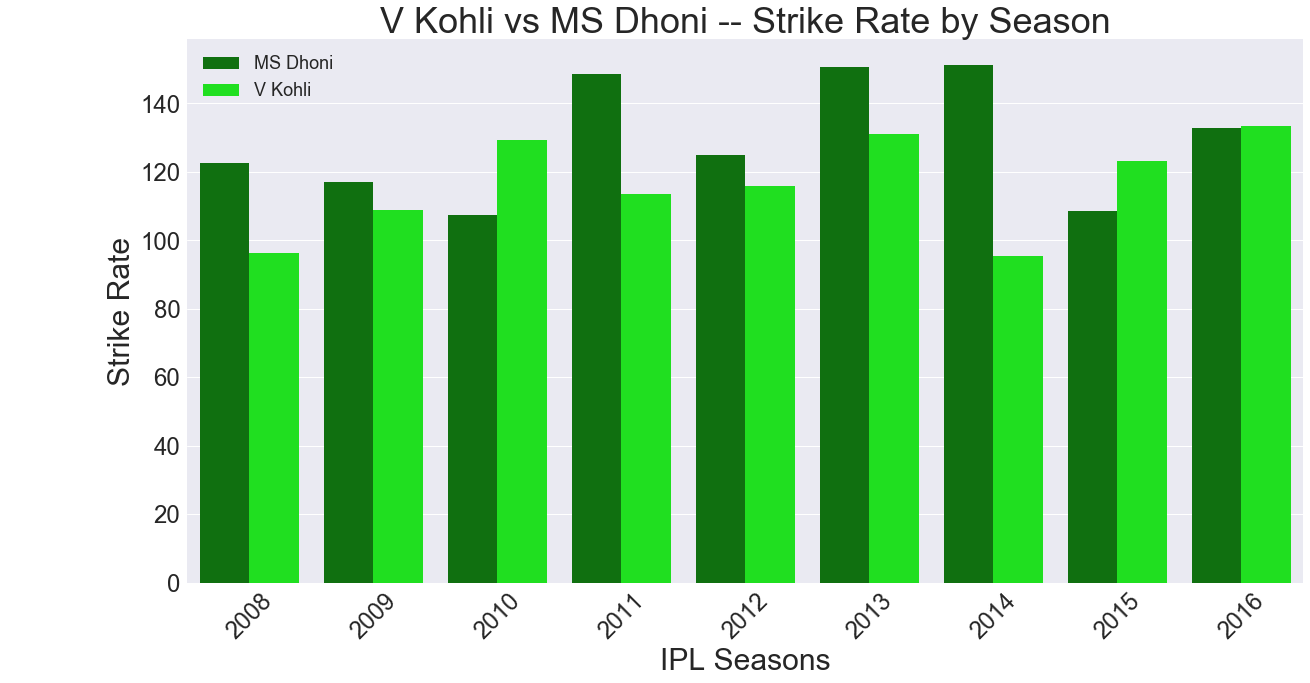

In [26]:
plt.subplots(figsize=(20,10))
sns.set_style("whitegrid")
colors= ['green','lime']
top = sns.barplot(x="season", y="Strike-Rate", hue="batsman",  palette=colors ,data=df_players_comparison_by_strike_rate)
top.set_title(str(inputstring)+" vs "+str(inputstring1)+" -- Strike Rate by Season")
plt.setp(top.xaxis.get_majorticklabels(),rotation=45)

top.set_xlabel("IPL Seasons")
top.set_ylabel("Strike Rate")
top.legend(fontsize= 18, loc="upper left")
top.xaxis.get_label().set_fontsize(30)
top.yaxis.get_label().set_fontsize(30)
top.title.set_fontsize(36)
top.tick_params(axis='x', which='major',labelsize=24)
top.tick_params(axis='y', which='major',labelsize=24)
top.annotate('Here, V Kohli faced more balls', fontsize=15, xy=(8, 640), xytext=(5, 550),arrowprops=dict(facecolor='black', shrink=0.07))
top.annotate('Here, MS Dhoni faced more balls', fontsize=15, xy=(0, 310), xytext=(1, 410),arrowprops=dict(facecolor='black', shrink=0.07))

### Conclusion
##### ~ Strike rate by MS Dhoni has nearly been more than V Kohli.